In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd

In [5]:
tf.set_random_seed(42)

In [6]:
tf.__version__

'2.1.0'

Collect the data

In [7]:
import keras

Using TensorFlow backend.


In [9]:
df=pd.read_csv("bank.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preparation

In [12]:
df1=df.drop(['RowNumber','Surname'],axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [14]:
df1['Geography']=lr.fit_transform(df1['Geography'])

In [15]:
df1['Gender']=lr.fit_transform(df1['Gender'])

In [16]:
df1.head(2)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0


In [17]:
for i in df1.columns:
  if df1[i].dtype != 'float32':
    df1[i]=df1[i].astype('float32')
    #print(df1[i].dtypes)

In [18]:
df1.shape

(10000, 12)

In [19]:
import seaborn as sns

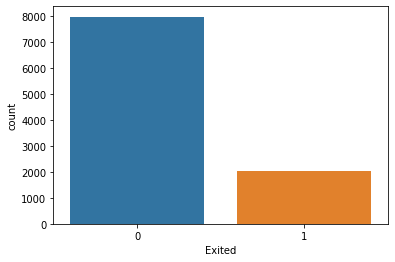

In [74]:
sns.countplot(x='Exited',data=df)

here the number of custemers who are leaving is very high when compared with number of customers who are not leaving....But in the problem statement ,our class of interest is '0'(leaving customers)...This model works well for prediction to those customers who are leaving from the services...

lets do upsampling to avoid biasing towards majority calss

In [21]:
!pip install imblearn

In [0]:
!pip install -q matplotlib-venn

In [0]:
import seaborn as sns


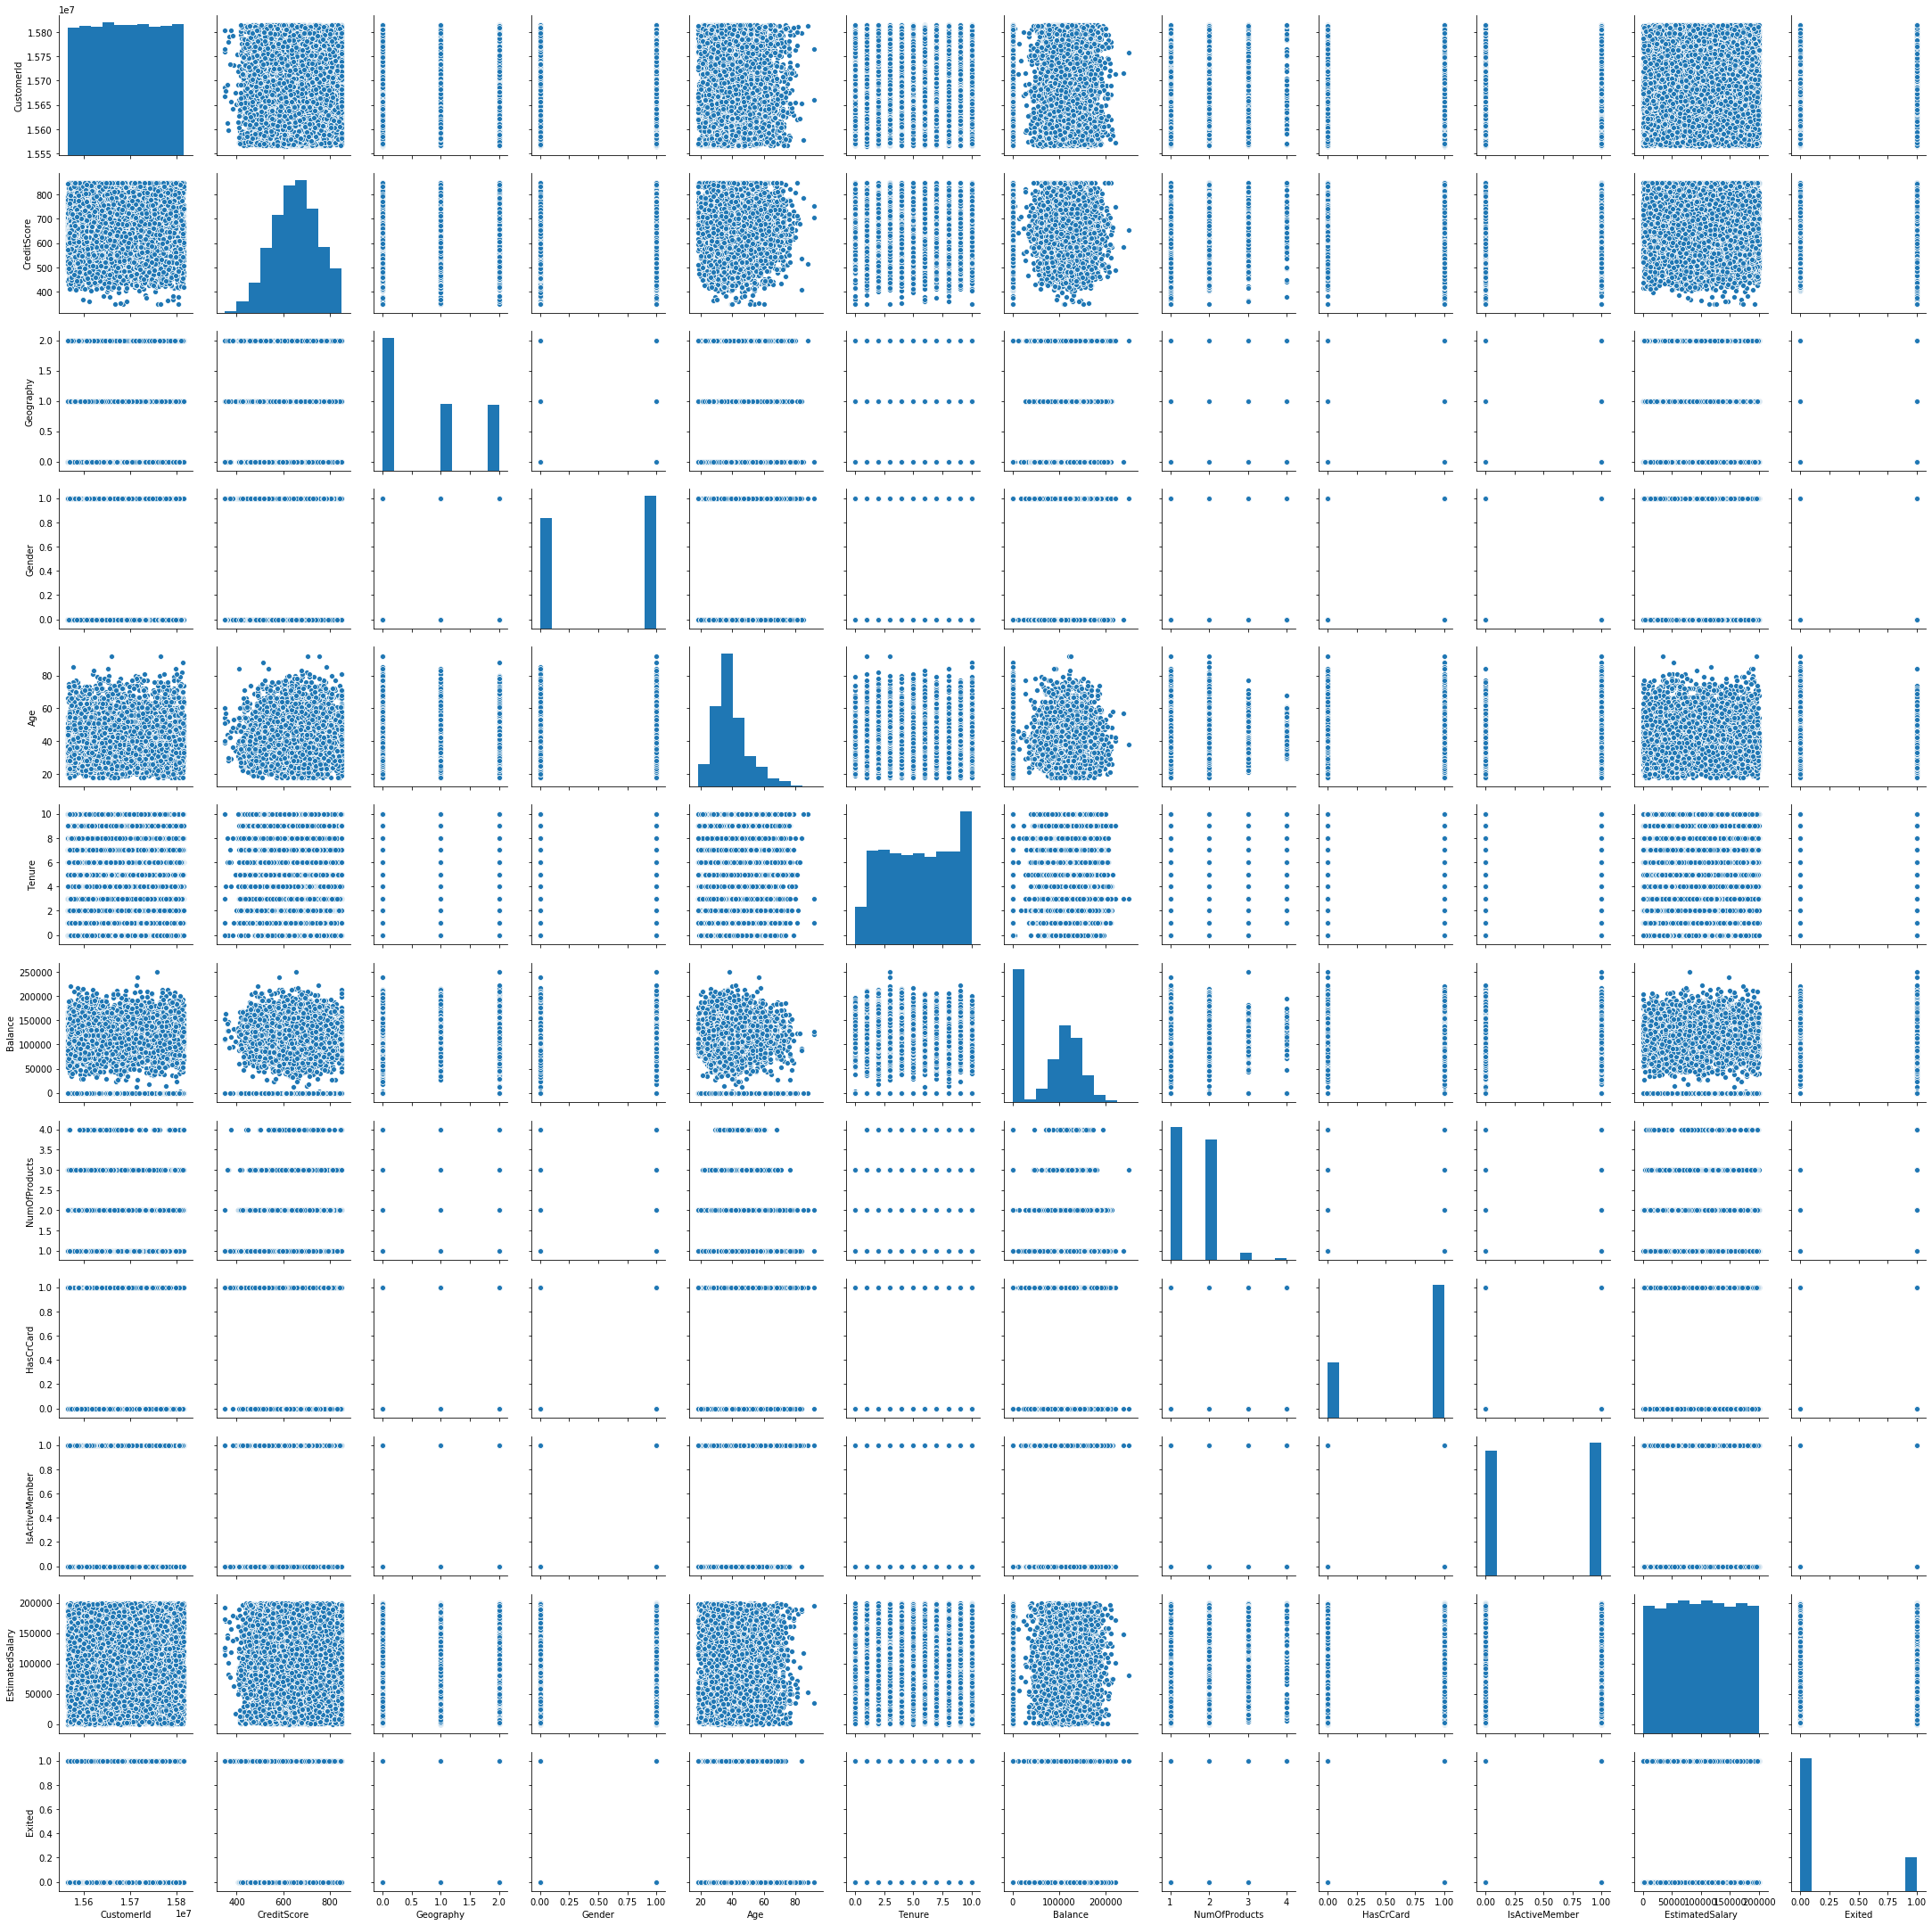

In [40]:
sns.pairplot(df1)

In [0]:
cov_df=np.cov(df1)

In [78]:
cov_df

array([[2.03467536e+13, 2.03520810e+13, 2.03064287e+13, ...,
        2.02880656e+13, 2.04008951e+13, 2.03299859e+13],
       [2.03520810e+13, 2.03579852e+13, 2.03128397e+13, ...,
        2.02933640e+13, 2.04067477e+13, 2.03361837e+13],
       [2.03064287e+13, 2.03128397e+13, 2.02682704e+13, ...,
        2.02478723e+13, 2.03614477e+13, 2.02914141e+13],
       ...,
       [2.02880656e+13, 2.02933640e+13, 2.02478723e+13, ...,
        2.02298344e+13, 2.03421301e+13, 2.02717171e+13],
       [2.04008951e+13, 2.04067477e+13, 2.03614477e+13, ...,
        2.03421301e+13, 2.04556635e+13, 2.03849842e+13],
       [2.03299859e+13, 2.03361837e+13, 2.02914141e+13, ...,
        2.02717171e+13, 2.03849842e+13, 2.03150961e+13]])

There is no high correlation between the variables in the dataset

In [0]:
sns.heatmap(cov_df,annot=True)

In [22]:
X=df1.drop('Exited',axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [0]:
#scaler.fit(X)

In [0]:
#X=scaler.transform(X)

In [25]:
y=df1["Exited"]

In [26]:
y=y.astype('int32')

In [27]:
y=y.astype("category")

In [28]:
y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [34]:
#from sklearn.model_selection import train_test_split

In [ ]:
X.head(3)

# Creating Train and Validationt

In [0]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.1,random_state=1)

In [0]:
scaler.fit(train_X)
train_X=scaler.transform(train_X)

In [285]:
test_X.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,15655952,550,0,1,47,2,0.00,2,1,1,97057.28
3850,15775293,680,0,1,34,3,143292.95,1,1,0,66526.01
4962,15665088,531,0,0,42,2,0.00,2,0,1,90537.47


In [0]:

#test_X_X=scaler.transform(test_X)

In [269]:
test_X.shape

(1000, 11)

In [0]:
trainX,validX,trainY,validY=train_test_split(train_X,train_y,test_size=0.2,random_state=1)

Feature Engineering

In [0]:
from imblearn.over_sampling import SMOTE

In [272]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(trainX, trainY.ravel())


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [240]:
sum(y_train_res==0)

5724

In [241]:
sum(y_train_res==0)

5724

In [0]:
X_train_res=np.array(trainX)
y_train_res=np.array(trainY)
validX=np.array(validX)
validY=np.array(validY)

In [193]:
validX.shape

(1800, 11)

# Build the model

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
y_train_res = tf.keras.utils.to_categorical(y_train_res, num_classes=2)
validY = tf.keras.utils.to_categorical(validY, num_classes=2)

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10,input_shape=(11,) ,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)    
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
tensorBoard=tf.keras.callbacks.TensorBoard(log_dir= '/board')

In [306]:
model.fit(X_train_res,y_train_res,          
          validation_data=(validX,validY),callbacks=[tensorBoard],
          epochs=50,
          batch_size=32)

Train on 7200 samples, validate on 1800 samples
Epoch 1/50
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3447 - acc: 0.8594 - val_loss: 0.3518 - val_acc: 0.8531
Epoch 2/50
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3443 - acc: 0.8611 - val_loss: 0.3525 - val_acc: 0.8519
Epoch 3/50
7200/7200 [==============================] - 1s 80us/sample - loss: 0.3438 - acc: 0.8595 - val_loss: 0.3538 - val_acc: 0.8483
Epoch 5/50
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3435 - acc: 0.8608 - val_loss: 0.3519 - val_acc: 0.8558
Epoch 6/50
7200/7200 [==============================] - 1s 77us/sample - loss: 0.3438 - acc: 0.8615 - val_loss: 0.3510 - val_acc: 0.8558
Epoch 7/50
7200/7200 [==============================] - 1s 78us/sample - loss: 0.3436 - acc: 0.8599 - val_loss: 0.3590 - val_acc: 0.8442
Epoch 8/50
7200/7200 [==============================] - 1s 80us/sample - loss: 0.3428 - acc: 0.8599 - val_loss: 0.3521 - val_acc: 

In [212]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 22        
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


# Evaluation

In [245]:
model.fit(X_train_res,y_train_res,          
          validation_data=(validX,validY),
          epochs=50,
          batch_size=32)

Train on 7200 samples, validate on 1800 samples
Epoch 1/50
7200/7200 [==============================] - 1s 118us/sample - loss: 0.5762 - acc: 0.7233 - val_loss: 0.4952 - val_acc: 0.8056
Epoch 2/50
7200/7200 [==============================] - 1s 80us/sample - loss: 0.4917 - acc: 0.7950 - val_loss: 0.4702 - val_acc: 0.8056
Epoch 3/50
7200/7200 [==============================] - 1s 78us/sample - loss: 0.4743 - acc: 0.7967 - val_loss: 0.4572 - val_acc: 0.8064
Epoch 4/50
7200/7200 [==============================] - 1s 80us/sample - loss: 0.4613 - acc: 0.8010 - val_loss: 0.4485 - val_acc: 0.8119
Epoch 5/50
7200/7200 [==============================] - 1s 79us/sample - loss: 0.4506 - acc: 0.8058 - val_loss: 0.4403 - val_acc: 0.8153
Epoch 6/50
7200/7200 [==============================] - 1s 81us/sample - loss: 0.4425 - acc: 0.8080 - val_loss: 0.4341 - val_acc: 0.8214
Epoch 7/50
7200/7200 [==============================] - 1s 84us/sample - loss: 0.4366 - acc: 0.8094 - val_loss: 0.4251 - val_acc:

In [0]:
model.save('R6_pro2.h5')

In [0]:
from google.colab import files

files.download('R6_pro2.h5')

In [52]:
!ls -1

bank.csv
drive
R6_pro1.h5
sample_data


In [116]:
model = tf.keras.models.load_model('R6_pro1.h5')

In [0]:
scaler.fit(test_X)
testX=scaler.transform(test_X)

In [0]:
pred=model.predict_classes(testX)

In [1]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [293]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.91       789\n           1       0.72      0.44      0.55       211\n\n    accuracy                           0.85      1000\n   macro avg       0.79      0.70      0.73      1000\nweighted avg       0.83      0.85      0.83      1000\n'

In [294]:
accuracy_score(test_y,pred)

0.846

In [0]:
confusion_matrix(test_y,pred)